# Cross Validation Case Study
Let's use the California Housing Prices dataset, which is available in scikit-learn, for this tutorial. We'll perform cross-validation using 5-fold and leave-one-out techniques and compare the results.

## Setup
We'll start by importing the necessary libraries for data manipulation, cross-validation, regression, and dataset loading.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load and Explore the Dataset
Next, we'll load the California Housing Prices dataset and explore its features and target variable.

In [6]:
# Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Convert the dataset to a DataFrame for easier exploration
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

# Print the first few rows of the dataset
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


## Cross Validation
Now, we'll perform cross-validation using different techniques and compare the results.

In [7]:
# Create a list to store the mean squared errors for different cross-validation techniques
mse_scores = []

# List of cross-validation techniques to be used
cv_methods = ['3-fold', '5-fold', '10-fold', 'Leave-One-Out']

for cv_method in cv_methods:
    if cv_method == '3-fold':
        cv = KFold(n_splits=3, shuffle=True, random_state=0)
    elif cv_method == '5-fold':
        cv = KFold(n_splits=5, shuffle=True, random_state=0)
    elif cv_method == '10-fold':
        cv = KFold(n_splits=10, shuffle=True, random_state=0)
    else:
        cv = LeaveOneOut()

    # Create and fit the linear regression model using cross-validation
    model = LinearRegression()
    mse_scores_cv = []

    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mse_scores_cv.append(mse)

    mse_scores.append(np.mean(mse_scores_cv))

# Display the mean squared errors for different cross-validation techniques
for i, cv_method in enumerate(cv_methods):
    print(f"{cv_method} Cross-Validation - Mean Squared Error: {mse_scores[i]:.4f}")

3-fold Cross-Validation - Mean Squared Error: 0.5264
5-fold Cross-Validation - Mean Squared Error: 0.5277
10-fold Cross-Validation - Mean Squared Error: 0.5279
Leave-One-Out Cross-Validation - Mean Squared Error: 0.5282


## Visualization
We can visualize the mean squared errors for different cross-validation techniques using a bar plot.

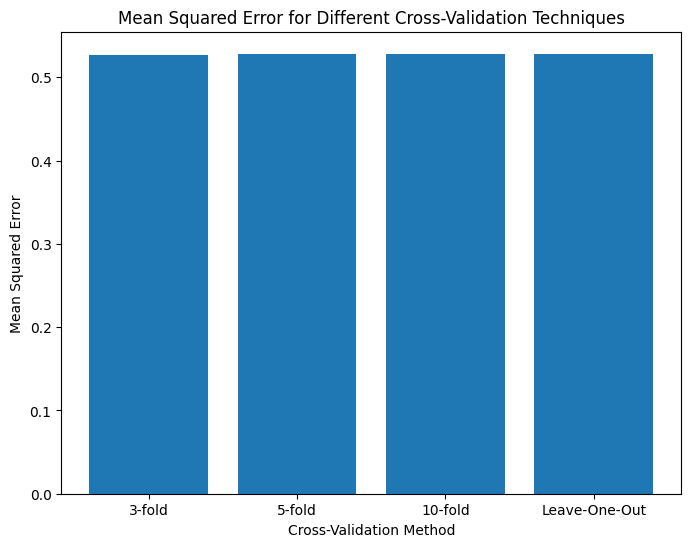

In [8]:
# Plotting mean squared errors for different cross-validation techniques
plt.figure(figsize=(8, 6))
plt.bar(cv_methods, mse_scores)
plt.xlabel("Cross-Validation Method")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for Different Cross-Validation Techniques")
plt.show()